In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('2022.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,03-Jan-2022,17387.15,17646.65,17383.30,17625.70,200456430,16181.36
1,04-Jan-2022,17681.40,17827.60,17593.55,17805.25,247437472,18604.16
2,05-Jan-2022,17820.10,17944.70,17748.85,17925.25,251460038,23737.31
3,06-Jan-2022,17768.50,17797.95,17655.55,17745.90,236454824,22643.82
4,07-Jan-2022,17797.60,17905.00,17704.55,17812.70,239338015,21447.89


In [55]:
df['bins'] = pd.qcut(df['Close'], 2) # Equal frequency binning

In [56]:
t = df.groupby(['bins']).mean(['Close'])

In [57]:
map_of_mean_values = {}
for i in t.iterrows():
    map_of_mean_values.update({str(i[0]): i[1][0]})

In [58]:
map_of_mean_values

{'(15293.499, 17063.25]': 16259.338888888888,
 '(17063.25, 18308.1]': 17522.008125}

In [59]:
df['bins'] = df['bins'].astype(str)

In [60]:
df['smoothed_values'] = df['bins'].apply(lambda x: map_of_mean_values[x])

In [61]:
df

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),bins,smoothed_values
0,03-Jan-2022,17387.15,17646.65,17383.30,17625.70,200456430,16181.36,"(17063.25, 18308.1]",17522.008125
1,04-Jan-2022,17681.40,17827.60,17593.55,17805.25,247437472,18604.16,"(17063.25, 18308.1]",17522.008125
2,05-Jan-2022,17820.10,17944.70,17748.85,17925.25,251460038,23737.31,"(17063.25, 18308.1]",17522.008125
3,06-Jan-2022,17768.50,17797.95,17655.55,17745.90,236454824,22643.82,"(17063.25, 18308.1]",17522.008125
4,07-Jan-2022,17797.60,17905.00,17704.55,17812.70,239338015,21447.89,"(17063.25, 18308.1]",17522.008125
...,...,...,...,...,...,...,...,...,...
156,19-Aug-2022,17966.55,17992.20,17710.75,17758.45,295627263,21531.99,"(17063.25, 18308.1]",17522.008125
157,22-Aug-2022,17682.90,17690.05,17467.35,17490.70,287559133,19605.44,"(17063.25, 18308.1]",17522.008125
158,23-Aug-2022,17357.35,17625.55,17345.20,17577.50,285616338,20365.80,"(17063.25, 18308.1]",17522.008125
159,24-Aug-2022,17525.45,17623.65,17499.25,17604.95,261953239,17819.88,"(17063.25, 18308.1]",17522.008125


In [62]:
import matplotlib.pyplot as plt

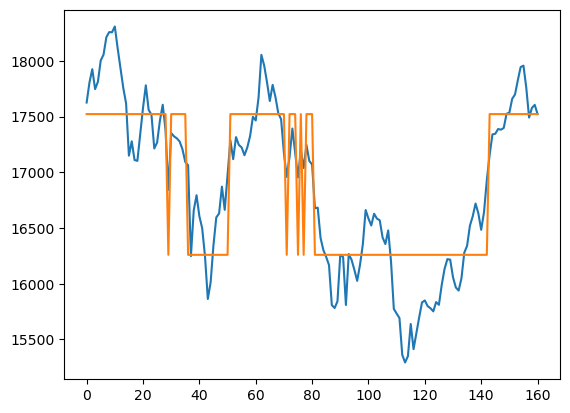

In [63]:
plt.plot(df['Close'])
plt.plot(df['smoothed_values'])

In [68]:
# importing pandas as pd
import pandas as pd
 
df = pd.read_csv("2022.csv", parse_dates =["Date"], index_col ="Date")
 
# close is the column on which
# we are performing the operation
# mean() function finds the mean over each window
rolling_close = df.Close.rolling(30).mean()

(array([18993., 19024., 19052., 19083., 19113., 19144., 19174., 19205.,
        19236.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

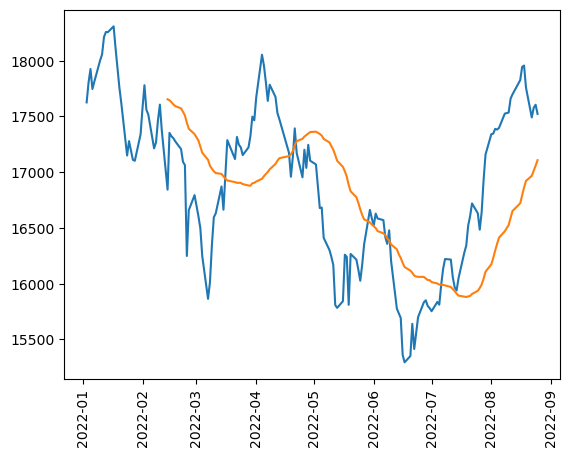

In [70]:
plt.plot(df['Close'])
plt.plot(rolling_close)
plt.xticks(rotation = 90)